In [1]:
import numpy as np

In [2]:
import cv2

In [3]:
from matplotlib import pyplot as plt

In [4]:
sample = cv2.imread('Sample3.jpeg')

In [5]:
import imutils
import easyocr

ModuleNotFoundError: No module named 'imutils'

In [7]:
%pip install easyocr


  Obtaining dependency information for easyocr from https://files.pythonhosted.org/packages/cb/0e/09bafec31db720e796d3f5b0814c37c5fdb59dcd35a2c6c6b1c774b09646/easyocr-1.7.1-py3-none-any.whl.metadata
  Using cached easyocr-1.7.1-py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/67/0a/b6dddafbb64d3ca13078a2616a2ea02c595da832586898a7eb414cf7ad10/torch-2.1.0-cp39-cp39-win_amd64.whl.metadata
  Using cached torch-2.1.0-cp39-cp39-win_amd64.whl.metadata (24 kB)
  Obtaining dependency information for torchvision>=0.5 from https://files.pythonhosted.org/packages/ec/36/1ecc19249def521b3b948baee32903148b1f399d2dd5a9a5692942e8383c/torchvision-0.16.0-cp39-cp39-win_amd64.whl.metadata
  Using cached torchvision-0.16.0-cp39-cp39-win_amd64.whl.metadata (6.6 kB)
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/e3/10/31b27a7473043eb5317f698ede00e7e129b2de378903bfe0bb4d785a7ba

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\DELL\\Desktop\\ML\\OpenCV\\.venv\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [147]:
img = cv2.imread('Sample3.jpeg')

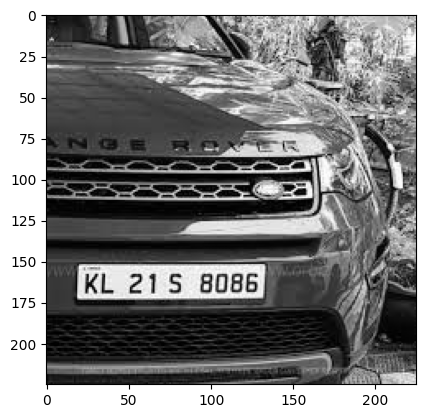

In [148]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.show()

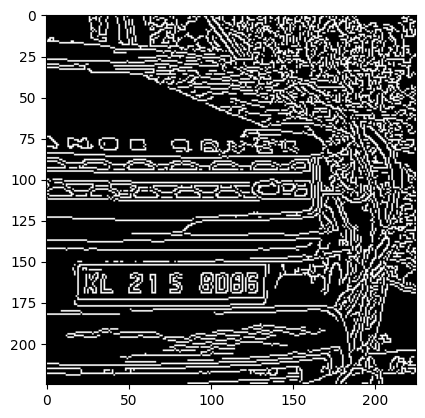

In [149]:
img_bfilter = cv2.bilateralFilter(img, 15, 15, 15)  #Bilateral filtering is a non-linear, edge-preserving, and noise-reducing smoothing filter.
img_edge = cv2.Canny(img_bfilter, 100, 300)   #cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)
plt.imshow(cv2.cvtColor(img_edge, cv2.COLOR_BGR2RGB)) 
plt.imshow(cv2.cvtColor(img_edge, cv2.COLOR_BGR2RGB))
plt.show()

In [150]:
kp = cv2.findContours(img_edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(kp)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [151]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    print(len(approx))
    if len(approx) == 4:
        location = approx
        break

6
4


In [152]:
mask = np.zeros(img_gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

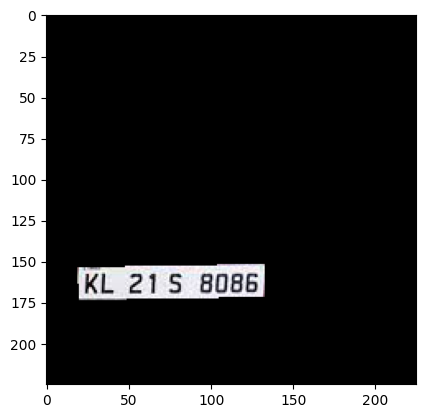

In [153]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [154]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
img_final = img_gray[x1:x2+1, y1:y2+1]

In [161]:
reader = easyocr.Reader(['en'])
reading = reader.readtext(img_final)
reading

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[1, 1], [113, 1], [113, 21], [1, 21]], 'KL 21 5 8086', 0.7171794651126404)]

In [166]:
dcti = {'O': '0',
        'I': '1',
        'J': '3',
        'A': '4',
        'G': '6',
        'S': '5'}

ditc = {'0': 'O',
        '1': 'I',
        '3': 'J',
        '4': 'A',
        '6': 'G',
        '5': 'S'}
def format_license(text):
    license_plate_ = ''
    if len(text) == 10:
        map = {0: ditc, 1: ditc, 4: ditc, 5: ditc,
               2: dcti, 3: dcti, 6: dcti, 7: dcti, 8: dcti, 9: dcti}
        for j in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
            if text[j] in map[j].keys():
                license_plate_ += map[j][text[j]]
            else:
                license_plate_ += text[j]
    if len(text) == 9:
        map = {0: ditc, 1: ditc, 4: ditc,
               2: dcti, 3: dcti, 5: dcti, 6: dcti, 7: dcti, 8: dcti}
        for j in [0, 1, 2, 3, 4, 5, 6, 7, 8]:
            if text[j] in map[j].keys():
                license_plate_ += map[j][text[j]]
            else:
                license_plate_ += text[j]

    return license_plate_

In [167]:
format_license((reading[0][1]).replace(" ", ""))

'KL21S8086'